## 로지스틱 회귀
### **딥러닝의 동작원리**

- **딥러닝을 수행**한다는 것은 겉으로 드러나지 않는 '미니 판단 장치'들을 이용해서 복잡한 연산을 해낸 끝에 최적의 예측 값을 내놓는 작업<br><br>

- 참인지 거짓인지 구별하는 **로지스틱 회귀**의 원리 이용해 '참, 거짓 미니 판단 장치'를 만들어 주어진 입력값 특징 추출(**학습, train**)<br><br>

- 이를 저장해 **모델(model)** 만듦<br><br>

- 누군가 비슷한 질문을 하면 지금까지 만들어 놓은 이 모델을 꺼내어 답으로 함(**예측, prediction**)<br><br>

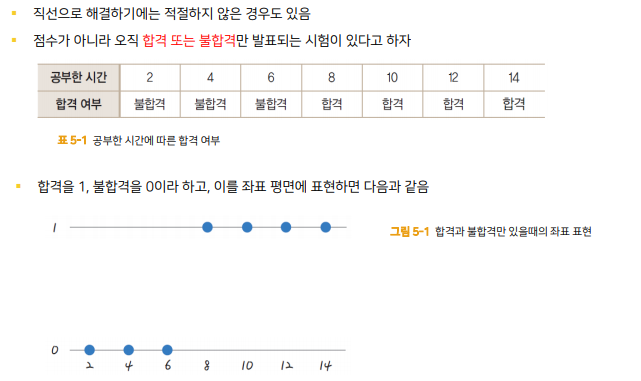

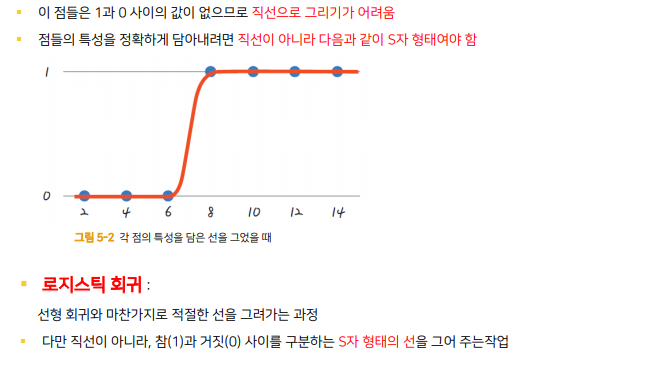

- 시그모이드 함수(sigmoid function): S자 형태로 그래프가 그려지는 함수<br><br>
 
 - -> 즉 로지스틱 회귀 위해선 시그모이드 함수 필요<br><br>

- 시그모이드 함수 이용해 로지스틱 회귀를 풀어나가는 공식은
$$ y = \frac{1}{1+e^{-(ax+b)}} $$<br>

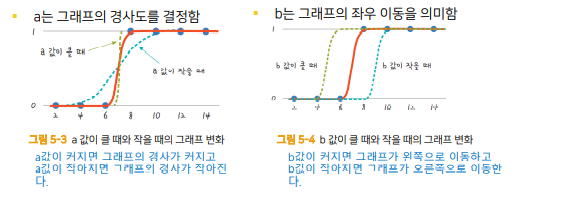

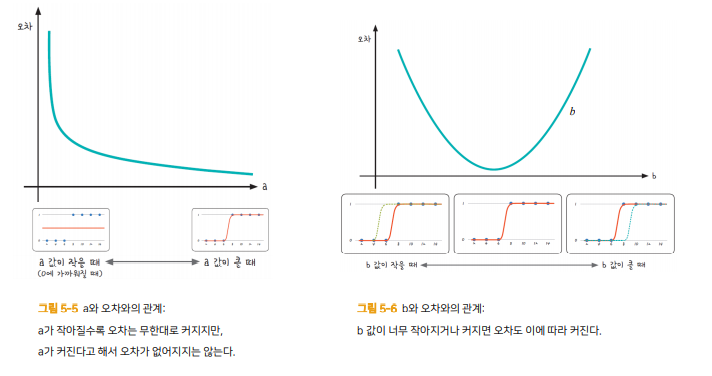

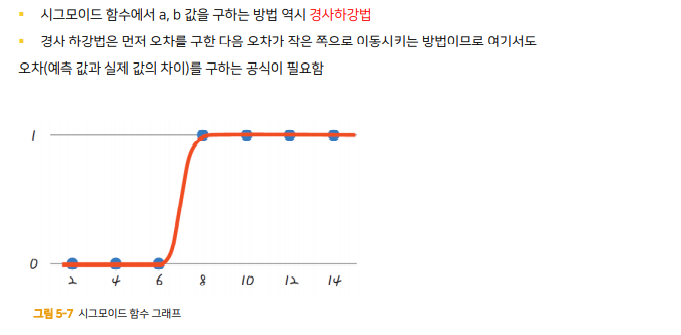

- 시그모이드 함수의 특징은 y 값이 0과 1 사이<br><br>

- 실제값 1일때 예측값이 0에 가까워지면 오차 커짐<br><br>

- 반대로, 실제 값이 0 일때 예측 값이 1에 가까워지는 경우도 오차 커짐<br><br>

- 이를 공식으로 만들수 있게 해 주는 함수가 로그 함수<br><br>
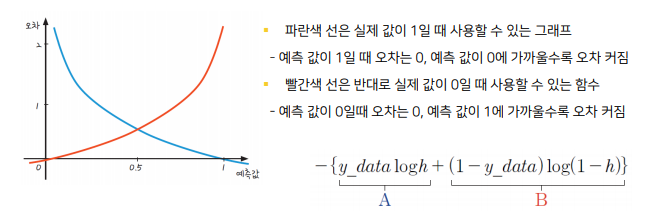

- 실제 값(y_data)가 1이면 B부분이 없어지고, 실제 값(y_data)가 0이면 A부분 없어짐<br><br>

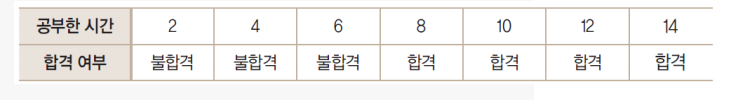

(-0.1, 1.1)

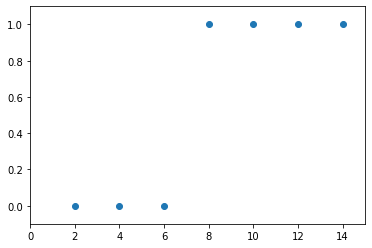

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

plt.scatter(x_data, y_data)
plt.xlim(0, 15) # 범위 지정
plt.ylim(-.1, 1.1) 

In [4]:
a = 0
b = 0

lr = 0.05

def sigmoid(x):
    return 1 / (1 + np.e ** (-x))


for i in range(2001):
    for x_data, y_data in data:
        # a 편미분
        a_diff = x_data * (sigmoid(a*x_data + b) - y_data)
        # b 편미분
        b_diff = sigmoid(a*x_data + b) - y_data
        
        a = a - lr * a_diff
        b = b - lr * b_diff
        
        if i % 1000 == 0:
            print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f' % (i, a, b))

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513


- 시그모이드 형태의 함수가 잘 만들어지도록 a와 b의 값이 수렴된 것을 알 수 있음<br><br>

- 만약 여기에 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면(다중 분류 문제) 시그모이드 함수가 아니라 소프트맥스(softmax)라는 함수를 써야 함<br>
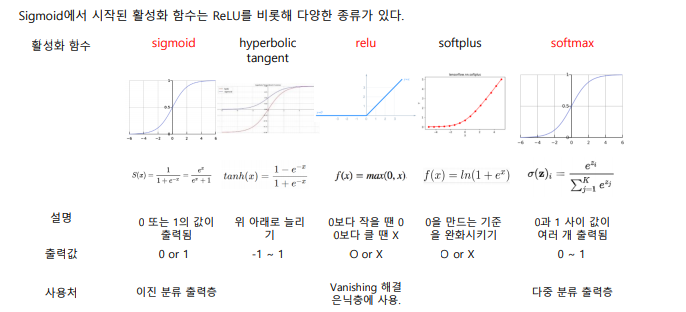

- 입력 값을 통해 출력 값을 구하는 함수 y는 다음과 같이 표현할 수 있음
$$ y = a_1x_1 + a_2x_2 + b $$<br>

- 입력값: $x_1, x_2$<br><br>
- 출력값: y<br><br>
 - 출력값 y 구하려면 가중치(weight) $a_1$값, $a_2$값 그리고 편향(bias) b값이 필요함
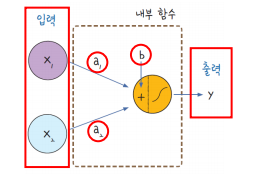